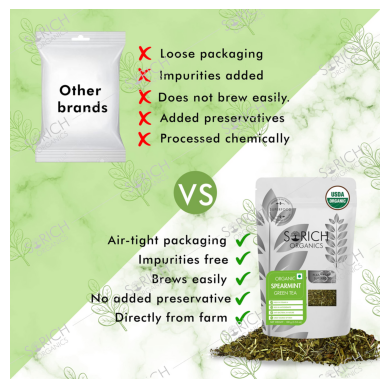

In [1]:
import cv2
import matplotlib.pyplot as plt
# Read the image
image = cv2.imread('images_with_metadata\image_15.png')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

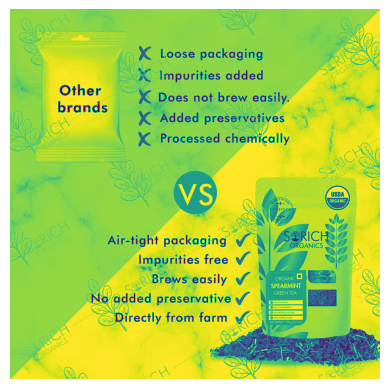

In [2]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the image
plt.imshow(gray_image)
plt.axis('off')  # Hide the axis
plt.show()

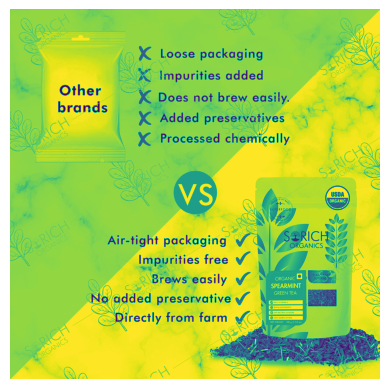

In [3]:

blurred_image = cv2.medianBlur(gray_image, 3)
plt.imshow(blurred_image)
plt.axis('off')  # Hide the axis
plt.show()

In [4]:
scale_percent = 200  # e.g., 200% of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(gray_image, (width, height), interpolation=cv2.INTER_LINEAR)


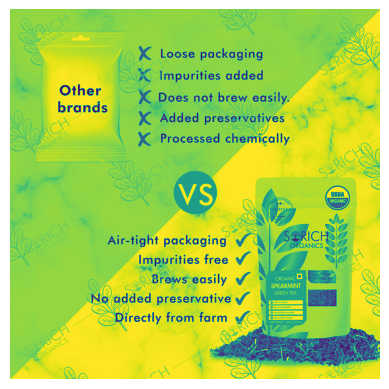

In [5]:
plt.imshow(resized_image)
plt.axis('off')  # Hide the axis
plt.show()

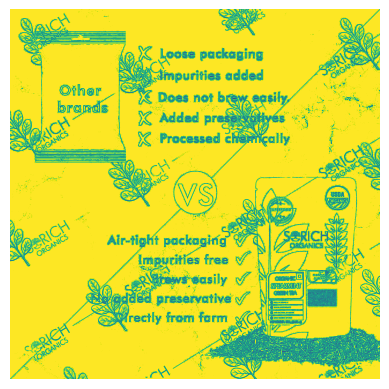

In [6]:
binary_image = cv2.adaptiveThreshold(resized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary_image)
plt.axis('off')  # Hide the axis
plt.show()

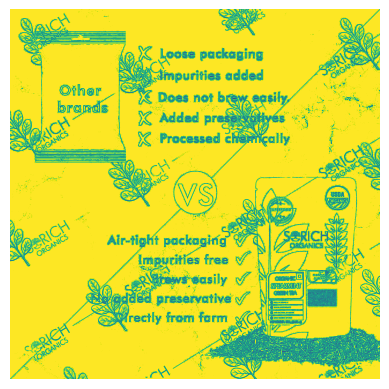

In [7]:
import numpy as np
kernel = np.ones((1, 1), np.uint8)
denoised_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
plt.imshow(denoised_image)
plt.axis('off')  # Hide the axis
plt.show()

In [8]:
coords = np.column_stack(np.where(binary_image > 0))
angle = cv2.minAreaRect(coords)[-1]
if angle < -45:
    angle = -(90 + angle)
else:
    angle = -angle
(h, w) = binary_image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(binary_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


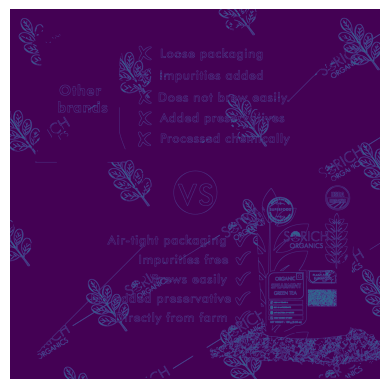

In [9]:
edges = cv2.Canny(resized_image, 100, 200)
plt.imshow(edges)
plt.axis('off')  # Hide the axis
plt.show()

In [13]:
import cv2
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"c:\Program Files\Tesseract-OCR\tesseract.exe"

# Read the image
image = cv2.imread('images_with_metadata\image_15.png')

# Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise reduction
blurred_image = cv2.medianBlur(gray_image, 3)

# Resize for small text detection
resized_image = cv2.resize(blurred_image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

# Thresholding
binary_image = cv2.adaptiveThreshold(resized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# OCR with Tesseract
config = '--psm 6'
text = pytesseract.image_to_string(binary_image, config=config)

print(text)


“if Oss , ~<OD S' SS aelk sen ep ee gee? NG WY
| | 7 Y {VGH So \ ween Ss KE (Sc N\ VW,
| SSW) in suritic a 7 EX -€ en Yj
| Other GX ._ ies added Zor NS
S| Piher Pk Does not | Ie
Wn | x7 ads | (2 ot brew ea sily, cre
SWI <cs | “ee dded preseWutve Cae BR tegen
Se oP | \ WwW p SSN (LY “3 ee
a ne cessed chemically Be
Sn NCW . . a oe » QO eX
Eww a GL NS
y \ oo ji ™— Zi WY IC ‘ ~\ q -ORGANIC#/:
A ; C A / - icine oo as - & NG REOOD | 7 , LL; y), a
NZ BES Re : | gts ee) ~( 1
\ gn packaging VS S@RICHSIZ
/ | mpurities WN |Z prcanics SIZ
WA, Caek. ee rs-easily 7 ™ | Fo IS Ww
~ (Y) “Zar poe | Y FR orcantel©| } eeeehO™
XE VSedded poreser ae a VN PEABO —— (
= a rectly trom tarm \ a ps SS
re | : oo Bo m S \ yp \ [Berman —— S
ES eo ee
ORR ae a
gor aA hE eae we
(os LH &ih PESTON Ny UPN ANC S SEDI SEMEN ERG ESLER NES
Pu OR Oo SEARLE EN IE ee NG ay ean ENG
W)\ A Pr * YY IN

